INF2178H: Final Project: Group 11  

Team Members
- Mansi Jain
- Zihan Mei
- Xi Fan

In [456]:
#Importing libraries that are going to be used further in our notebook
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
from statsmodels.graphics.factorplots import interaction_plot
import researchpy as rp
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower
from statsmodels.sandbox.stats.multicomp import multipletests

In [457]:
# Reading the data file through read_csv() function of Pandas and loading the data into Panda Dataframes. 
df_mat = pd.read_csv('/Users/Mansi/Documents/INF2178H/Project/student-mat.csv')

### RQ1: Does alcohol intake affect final grades of the students? 
*According to ‘Is Alcohol Consumption Associated with Poor Academic Achievement in
University Students?’ by Walid El Ansari, Christiane Stock, and Claire Mills 1 , alcohol consumption
showed negative associations with motivation for and subjectively achieved academic performance.
The university's alcohol prevention activities might have a positive impact on students academic
success.*

RQ1 Does alcohol intake affect final grades of the students?  
 **Experiment No. 1: Exploring the effect of weekend alcohol consumption on final grades of students.**
1. **Design**: Full Factorial
2. **Hypothesis**
   - H0: There is no difference in means of final grades of students consuming different levels of alcohol on weekend
   - H1: There is difference in means of final grades of students consuming different levels of alcohol on weekend 
3. **Method**: One-Way Anova
4. **Input Variable(s)**: Walc (Weekend Alcohol Consumption)
5. **Output Variable** : G3 (Final Grades)

In [458]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['Walc','G3']])

Variable  Outcome  Count  Percent
0      Walc        1    151    38.23
1                  2     85    21.52
2                  3     80    20.25
3                  4     51    12.91
4                  5     28     7.09
5        G3       10     56    14.18
6                 11     47    11.90
7                  0     38     9.62
8                 15     33     8.35
9                  8     32     8.10
10                13     31     7.85
11                12     31     7.85
12                 9     28     7.09
13                14     27     6.84
14                16     16     4.05
15                 6     15     3.80
16                18     12     3.04
17                 7      9     2.28
18                 5      7     1.77
19                17      6     1.52
20                19      5     1.27
21                 4      1     0.25
22                20      1     0.25

In [459]:
# Extracting relevent data in different dataframes
Walc_1 = df_mat[df_mat['Walc']==1]
Walc_2 = df_mat[df_mat['Walc']==2]
Walc_3 = df_mat[df_mat['Walc']==3]
Walc_4 = df_mat[df_mat['Walc']==4]
Walc_5 = df_mat[df_mat['Walc']==5]
Walc_1_G3 = Walc_1['G3']
Walc_2_G3 = Walc_2['G3']
Walc_3_G3 = Walc_3['G3']
Walc_4_G3 = Walc_4['G3']
Walc_5_G3 = Walc_4['G3']
Dalc_1 = df_mat[df_mat['Dalc']==1]
Dalc_2 = df_mat[df_mat['Dalc']==2]
Dalc_3 = df_mat[df_mat['Dalc']==3]
Dalc_4 = df_mat[df_mat['Dalc']==4]
Dalc_5 = df_mat[df_mat['Dalc']==5]
Dalc_1_G3 = Dalc_1['G3']
Dalc_2_G3 = Dalc_2['G3']
Dalc_3_G3 = Dalc_3['G3']
Dalc_4_G3 = Dalc_4['G3']
Dalc_5_G3 = Dalc_4['G3']

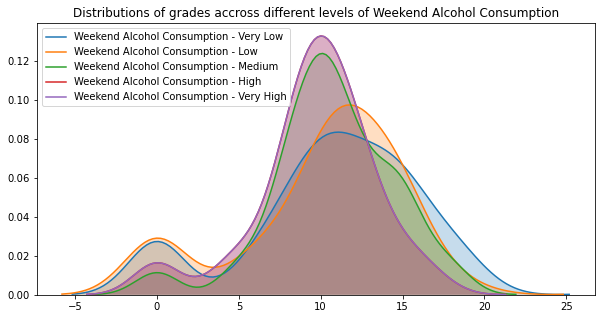

In [460]:
# KDE plot to visualize the distribution of observations
plt.figure(figsize=(10, 5))
sns.kdeplot(Walc_1_G3, shade=True, label='Weekend Alcohol Consumption - Very Low')
sns.kdeplot(Walc_2_G3, shade=True, label='Weekend Alcohol Consumption - Low')
sns.kdeplot(Walc_3_G3, shade=True, label='Weekend Alcohol Consumption - Medium')
sns.kdeplot(Walc_4_G3, shade=True, label='Weekend Alcohol Consumption - High')
sns.kdeplot(Walc_5_G3, shade=True, label='Weekend Alcohol Consumption - Very High')

plt.title("Distributions of grades accross different levels of Weekend Alcohol Consumption")

plt.show()

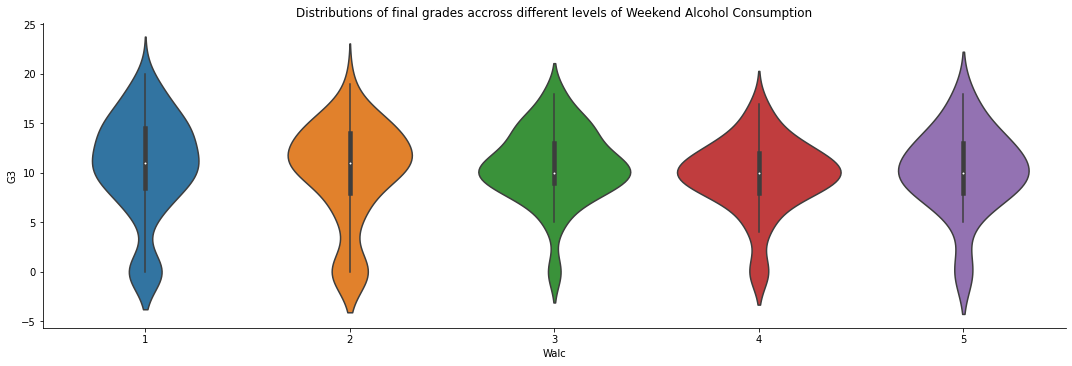

In [461]:
# Violin plot to visualize data distributions
sns.catplot(x="Walc", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of final grades accross different levels of Weekend Alcohol Consumption")
plt.show()

In [462]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ Walc', data=df_mat).fit()
anova_table = sa.stats.anova_lm(lm)
print(anova_table)

             df       sum_sq    mean_sq         F    PR(>F)
Walc        1.0    22.309678  22.309678  1.063061  0.303152
Residual  393.0  8247.599183  20.986257       NaN       NaN


**P-value is not significant**

RQ1 Does alcohol intake affect final grades of the students?  
**Experiment No. 2: Exploring the effect of weekday alcohol consumption on final grades of students.**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of final grades of students consuming different levels of alcohol on weekdays
    - H1: There is difference in means of final grades of students consuming different levels of alcohol on weekdays
3. **Method**: One-Way Anova
4. **Input Variable(s)**: Dalc (Weekday Alcohol Consumption)
5. **Output Variable** : G3 (Final Grades)

In [463]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['Dalc','G3']])

Variable  Outcome  Count  Percent
0      Dalc        1    276    69.87
1                  2     75    18.99
2                  3     26     6.58
3                  5      9     2.28
4                  4      9     2.28
5        G3       10     56    14.18
6                 11     47    11.90
7                  0     38     9.62
8                 15     33     8.35
9                  8     32     8.10
10                13     31     7.85
11                12     31     7.85
12                 9     28     7.09
13                14     27     6.84
14                16     16     4.05
15                 6     15     3.80
16                18     12     3.04
17                 7      9     2.28
18                 5      7     1.77
19                17      6     1.52
20                19      5     1.27
21                 4      1     0.25
22                20      1     0.25

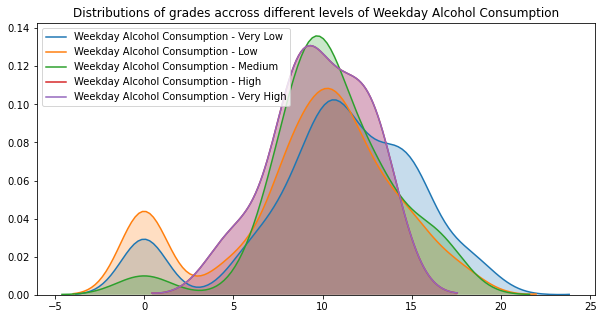

In [464]:
# KDE plot to visualize the distribution of observations
plt.figure(figsize=(10, 5))
sns.kdeplot(Dalc_1_G3, shade=True, label='Weekday Alcohol Consumption - Very Low')
sns.kdeplot(Dalc_2_G3, shade=True, label='Weekday Alcohol Consumption - Low')
sns.kdeplot(Dalc_3_G3, shade=True, label='Weekday Alcohol Consumption - Medium')
sns.kdeplot(Dalc_4_G3, shade=True, label='Weekday Alcohol Consumption - High')
sns.kdeplot(Dalc_5_G3, shade=True, label='Weekday Alcohol Consumption - Very High')

plt.title("Distributions of grades accross different levels of Weekday Alcohol Consumption")

plt.show()

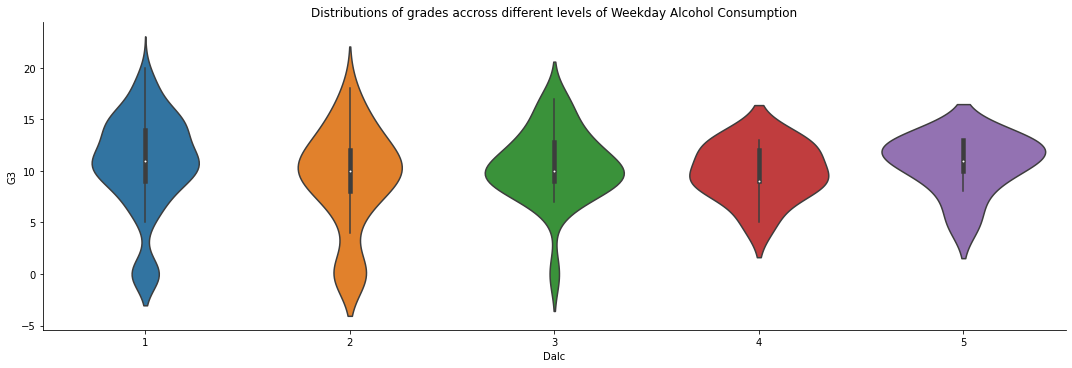

In [465]:
# Violin plot to visualize data distributions
sns.catplot(x="Dalc", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of grades accross different levels of Weekday Alcohol Consumption")
plt.show()

In [466]:
# generate fit model to data to obtain parameter estimates
model = sfa.ols('G3 ~ Dalc', data=df_mat).fit()
anova_table = sa.stats.anova_lm(model)
print(anova_table)

             df       sum_sq    mean_sq         F    PR(>F)
Dalc        1.0    24.708172  24.708172  1.177693  0.278491
Residual  393.0  8245.200688  20.980154       NaN       NaN


RQ1 Does alcohol intake affect final grades of the students?  
**Experiment No. 3: Exploring the effect of weekday alcohol consumption on final grades of Males and Females.**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of final grades of Males and Females consuming different levels of alcohol on weekdays  
    - H1: There is difference in means of final grades of Males and Females consuming different levels of alcohol on weekdays  
3. **Method**: Two-Way Anova
4. **Input Variable(s)**: Dalc (Weekday Alcohol Consumption), sex(Gender)
5. **Output Variable** : G3 (Final Grades)

In [467]:
# Extracting relevent data in different dataframes
Dalc_1_F = Dalc_1[Dalc_1['sex']=='F']
Dalc_1_M_G3 = Dalc_1_M['G3']
Dalc_1_F_G3 = Dalc_1_F['G3']
Dalc_2_M = Dalc_2[Dalc_2['sex']=='M']
Dalc_2_F = Dalc_2[Dalc_2['sex']=='F']
Dalc_2_M_G3 = Dalc_2_M['G3']
Dalc_2_F_G3 = Dalc_2_F['G3']
Dalc_3_M = Dalc_3[Dalc_3['sex']=='M']
Dalc_3_F = Dalc_3[Dalc_3['sex']=='F']
Dalc_3_M_G3 = Dalc_3_M['G3']
Dalc_3_F_G3 = Dalc_3_F['G3']
Dalc_4_M = Dalc_4[Dalc_4['sex']=='M']
Dalc_4_F = Dalc_4[Dalc_4['sex']=='F']
Dalc_4_M_G3 = Dalc_4_M['G3']
Dalc_4_F_G3 = Dalc_4_F['G3']
Dalc_5_M = Dalc_5[Dalc_5['sex']=='M']
Dalc_5_F = Dalc_5[Dalc_5['sex']=='F']
Dalc_5_M_G3 = Dalc_5_M['G3']
Dalc_5_F_G3 = Dalc_5_F['G3']

/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


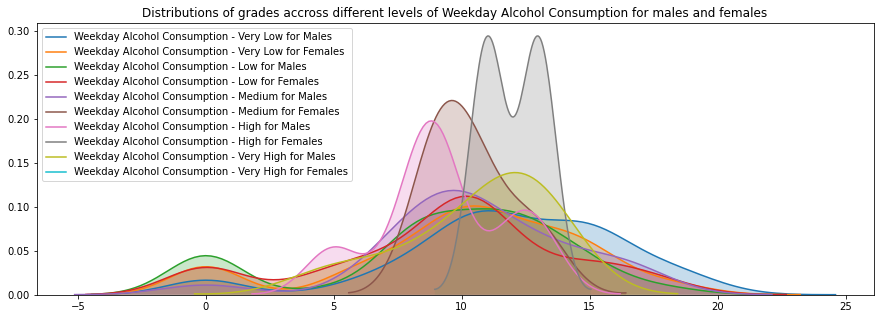

In [468]:
# KDE plot to visualize the distribution of observations
plt.figure(figsize=(15, 5))
sns.kdeplot(Dalc_1_M_G3, shade=True, label='Weekday Alcohol Consumption - Very Low for Males')
sns.kdeplot(Dalc_1_F_G3, shade=True, label='Weekday Alcohol Consumption - Very Low for Females')
sns.kdeplot(Dalc_2_M_G3, shade=True, label='Weekday Alcohol Consumption - Low for Males')
sns.kdeplot(Dalc_2_F_G3, shade=True, label='Weekday Alcohol Consumption - Low for Females')
sns.kdeplot(Dalc_3_M_G3, shade=True, label='Weekday Alcohol Consumption - Medium for Males')
sns.kdeplot(Dalc_3_F_G3, shade=True, label='Weekday Alcohol Consumption - Medium for Females')
sns.kdeplot(Dalc_4_M_G3, shade=True, label='Weekday Alcohol Consumption - High for Males')
sns.kdeplot(Dalc_4_F_G3, shade=True, label='Weekday Alcohol Consumption - High for Females')
sns.kdeplot(Dalc_5_M_G3, shade=True, label='Weekday Alcohol Consumption - Very High for Males')
sns.kdeplot(Dalc_5_F_G3, shade=True, label='Weekday Alcohol Consumption - Very High for Females')
plt.title("Distributions of grades accross different levels of Weekday Alcohol Consumption for males and females")

plt.show()

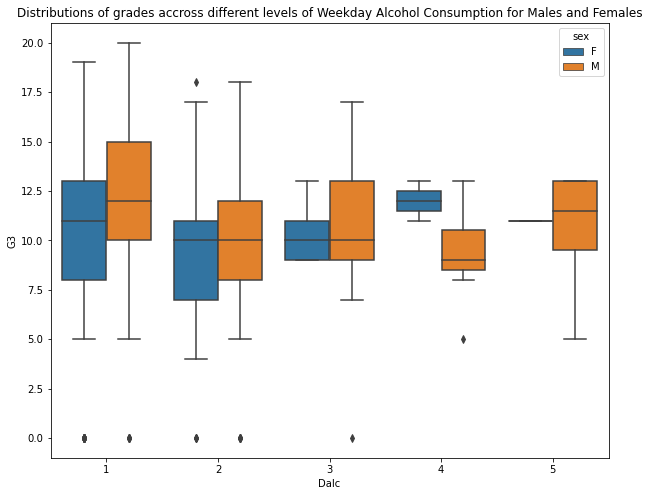

In [469]:
# Box plot to visualize data distributions
plt.figure(figsize=(10, 8))
sns.boxplot(x="Dalc", y="G3", hue="sex", data=df_mat)
plt.title("Distributions of grades accross different levels of Weekday Alcohol Consumption for Males and Females")
plt.show()

In [470]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='G3 ~ C(Dalc,Sum) + C(sex,Sum) + C(Dalc,Sum) * C(sex,Sum)', data=df_mat).fit()

#show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))

                               sum_sq     df         F    PR(>F)
C(Dalc, Sum)               170.838610    4.0  2.073137  0.083650
C(sex, Sum)                127.178146    1.0  6.173258  0.013394
C(Dalc, Sum):C(sex, Sum)    78.993012    4.0  0.958585  0.430170
Residual                  7931.563817  385.0       NaN       NaN


RQ1 Does alcohol intake affect final grades of the students?  
**Experiment No. 4: Exploring the effect of Gender on final grades.**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of final grades of Males and Females 
    - H1: There is difference in means of final grades of Males and Females
3. **Method**: One-Way Anova
4. **Input Variable(s)**: sex(Gender)
5. **Output Variable** : G3 (Final Grades)

In [471]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['sex','G3']])

Variable Outcome  Count  Percent
0       sex       F    208    52.66
1                 M    187    47.34
2        G3      10     56    14.18
3                11     47    11.90
4                 0     38     9.62
5                15     33     8.35
6                 8     32     8.10
7                13     31     7.85
8                12     31     7.85
9                 9     28     7.09
10               14     27     6.84
11               16     16     4.05
12                6     15     3.80
13               18     12     3.04
14                7      9     2.28
15                5      7     1.77
16               17      6     1.52
17               19      5     1.27
18                4      1     0.25
19               20      1     0.25

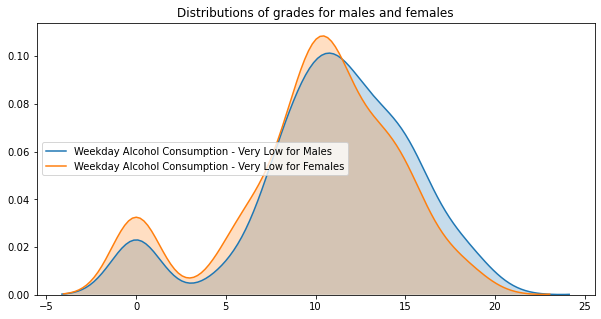

In [472]:
# Extracting relevent data in different dataframes
df_mat_M = df_mat[df_mat['sex']=='M']
df_mat_F = df_mat[df_mat['sex']=='F']
df_mat_M_G3 = df_mat_M['G3']
df_mat_F_G3 = df_mat_F['G3']
plt.figure(figsize=(10, 5))
sns.kdeplot(df_mat_M_G3, shade=True, label='Weekday Alcohol Consumption - Very Low for Males')
sns.kdeplot(df_mat_F_G3, shade=True, label='Weekday Alcohol Consumption - Very Low for Females')
plt.title("Distributions of grades for males and females")
plt.show()

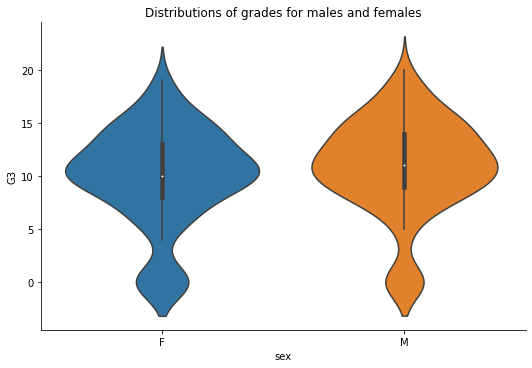

In [473]:
# Violin plot to visualize data distributions
sns.catplot(x="sex", y="G3", data=df_mat, dodge=True, kind='violin', aspect=1.5)
plt.title("Distributions of grades for males and females")
plt.show()

In [474]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ C(sex, Sum)', data=df_mat).fit()
# print test summary 
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.252
Date:                Fri, 09 Apr 2021   Prob (F-statistic):             0.0399
Time:                        23:58:52   Log-Likelihood:                -1159.1
No. Observations:                 395   AIC:                             2322.
Df Residuals:                     393   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.4404      0.230     45.413      0.000       9.988      10.892
C(sex, Sum)[S.F]    -0.4740      0.230     -2.062      0.040      -0.926      -0.022
==============================================================================
Omnibus:                       32.356   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.906
Skew:                          -0.733   Prob(JB):                     5.87e-09
Kurtosis:                       3.391   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RQ1 Does alcohol intake affect final grades of the students?  
**Experiment No. 5: Exploring the weekend alcohol consumption on final grades of males and females.**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of final grades of Males and Females consuming different levels of alcohol on weekends
    - H1: There is difference in means of final grades of Males and Females consuming different levels of alcohol on weekends
3. **Method**: Two-Way Anova
4. **Input Variable(s)**: Walc (Weekend Alcohol Consumption), sex(Gender)
5. **Output Variable** : G3 (Final Grades)

In [475]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['Walc','sex','G3']])

Variable Outcome  Count  Percent
0      Walc       1    151    38.23
1                 2     85    21.52
2                 3     80    20.25
3                 4     51    12.91
4                 5     28     7.09
5       sex       F    208    52.66
6                 M    187    47.34
7        G3      10     56    14.18
8                11     47    11.90
9                 0     38     9.62
10               15     33     8.35
11                8     32     8.10
12               13     31     7.85
13               12     31     7.85
14                9     28     7.09
15               14     27     6.84
16               16     16     4.05
17                6     15     3.80
18               18     12     3.04
19                7      9     2.28
20                5      7     1.77
21               17      6     1.52
22               19      5     1.27
23                4      1     0.25
24               20      1     0.25

In [476]:
# Extracting relevent data in different dataframes
Walc_1_M = Walc_1[Walc_1['sex']=='M']
Walc_1_F = Walc_1[Walc_1['sex']=='F']
Walc_1_M_G3 = Walc_1_M['G3']
Walc_1_F_G3 = Walc_1_F['G3']
Walc_2_M = Walc_2[Walc_2['sex']=='M']
Walc_2_F = Walc_2[Walc_2['sex']=='F']
Walc_2_M_G3 = Walc_2_M['G3']
Walc_2_F_G3 = Walc_2_F['G3']
Walc_3_M = Walc_3[Walc_3['sex']=='M']
Walc_3_F = Walc_3[Walc_3['sex']=='F']
Walc_3_M_G3 = Walc_3_M['G3']
Walc_3_F_G3 = Walc_3_F['G3']
Walc_4_M = Walc_4[Walc_4['sex']=='M']
Walc_4_F = Walc_4[Walc_4['sex']=='F']
Walc_4_M_G3 = Walc_4_M['G3']
Walc_4_F_G3 = Walc_4_F['G3']
Walc_5_M = Walc_5[Walc_5['sex']=='M']
Walc_5_F = Walc_5[Walc_5['sex']=='F']
Walc_5_M_G3 = Walc_5_M['G3']
Walc_5_F_G3 = Walc_5_F['G3']

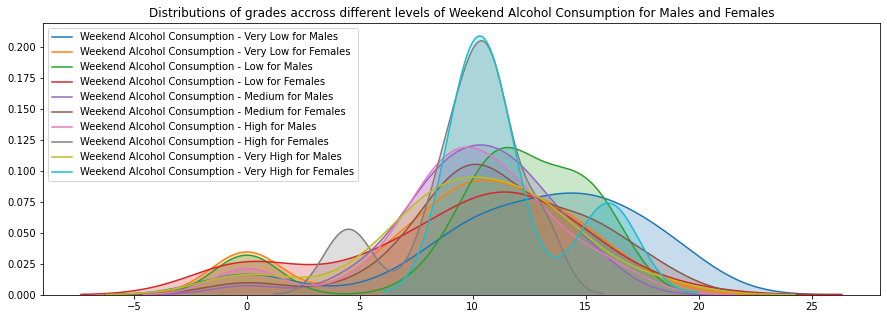

In [477]:
# KDE plot to visualize the distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.kdeplot(Walc_1_M_G3, shade=True, label='Weekend Alcohol Consumption - Very Low for Males')
sns.kdeplot(Walc_1_F_G3, shade=True, label='Weekend Alcohol Consumption - Very Low for Females')
sns.kdeplot(Walc_2_M_G3, shade=True, label='Weekend Alcohol Consumption - Low for Males')
sns.kdeplot(Walc_2_F_G3, shade=True, label='Weekend Alcohol Consumption - Low for Females')
sns.kdeplot(Walc_3_M_G3, shade=True, label='Weekend Alcohol Consumption - Medium for Males')
sns.kdeplot(Walc_3_F_G3, shade=True, label='Weekend Alcohol Consumption - Medium for Females')
sns.kdeplot(Walc_4_M_G3, shade=True, label='Weekend Alcohol Consumption - High for Males')
sns.kdeplot(Walc_4_F_G3, shade=True, label='Weekend Alcohol Consumption - High for Females')
sns.kdeplot(Walc_5_M_G3, shade=True, label='Weekend Alcohol Consumption - Very High for Males')
sns.kdeplot(Walc_5_F_G3, shade=True, label='Weekend Alcohol Consumption - Very High for Females')
plt.title("Distributions of grades accross different levels of Weekend Alcohol Consumption for Males and Females")
plt.show()

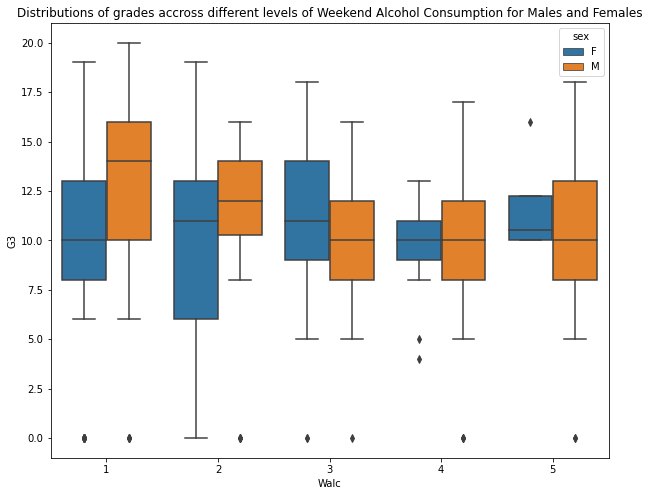

In [478]:
# Box plot to visualize data distributions
plt.figure(figsize=(10, 8))
sns.boxplot(x="Walc", y="G3", hue="sex", data=df_mat)
plt.title("Distributions of grades accross different levels of Weekend Alcohol Consumption for Males and Females")
plt.show()

In [479]:
# fit model to data to obtain parameter estimates
my_model_fit = ols(formula='G3 ~ Walc + sex + Walc * sex', data=df_mat).fit()
anova_table = sm.stats.anova_lm(my_model_fit,typ=2)
print(anova_table)

               sum_sq     df         F    PR(>F)
sex        123.872806    1.0  6.103650  0.013916
Walc        57.669063    1.0  2.841558  0.092653
Walc:sex   188.431095    1.0  9.284665  0.002468
Residual  7935.295281  391.0       NaN       NaN


### RQ3: Does family relations affect students' health and alcohol intake?
*The ‘Equality of Educational Opportunity’ by James S. Coleman (1966) 3 , reveals that families may
play even more important roles in a student's academic achievement than schools and communities.
Thus, we will focus on family relations and try to find the effects of it on students*

 **Experiment No. 1: Exploring the effect of quality of family relations on students' health**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of health status of students with different quality levels of family relations
    - H1: There is difference in means of health status of students with different quality levels of family relations
3. **Method**: One-Way Anova
4. **Input Variable(s)**: famrel (Quality of family relationships)
5. **Output Variable** : health (Current health status)

In [480]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['famrel','health']])

Variable  Outcome  Count  Percent
0   famrel        4    195    49.37
1                 5    106    26.84
2                 3     68    17.22
3                 2     18     4.56
4                 1      8     2.03
5   health        5    146    36.96
6                 3     91    23.04
7                 4     66    16.71
8                 1     47    11.90
9                 2     45    11.39

In [481]:
# Extracting relevent data in different dataframes
famrel_1 = df_mat[df_mat['famrel']==1]
famrel_2 = df_mat[df_mat['famrel']==2]
famrel_3 = df_mat[df_mat['famrel']==3]
famrel_4 = df_mat[df_mat['famrel']==4]
famrel_5 = df_mat[df_mat['famrel']==5]
famrel_1_Health = famrel_1['health']
famrel_2_Health = famrel_2['health']
famrel_3_Health = famrel_3['health']
famrel_4_Health = famrel_4['health']
famrel_5_Health = famrel_5['health']

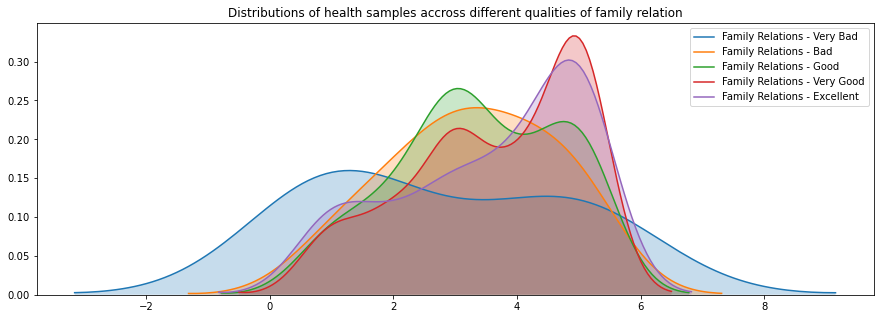

In [482]:
# KDE plot to visualize the distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.kdeplot(famrel_1_Health, shade=True, label='Family Relations - Very Bad')
sns.kdeplot(famrel_2_Health, shade=True, label='Family Relations - Bad')
sns.kdeplot(famrel_3_Health, shade=True, label='Family Relations - Good')
sns.kdeplot(famrel_4_Health, shade=True, label='Family Relations - Very Good')
sns.kdeplot(famrel_5_Health, shade=True, label='Family Relations - Excellent')
plt.title("Distributions of health samples accross different qualities of family relation")
plt.show()

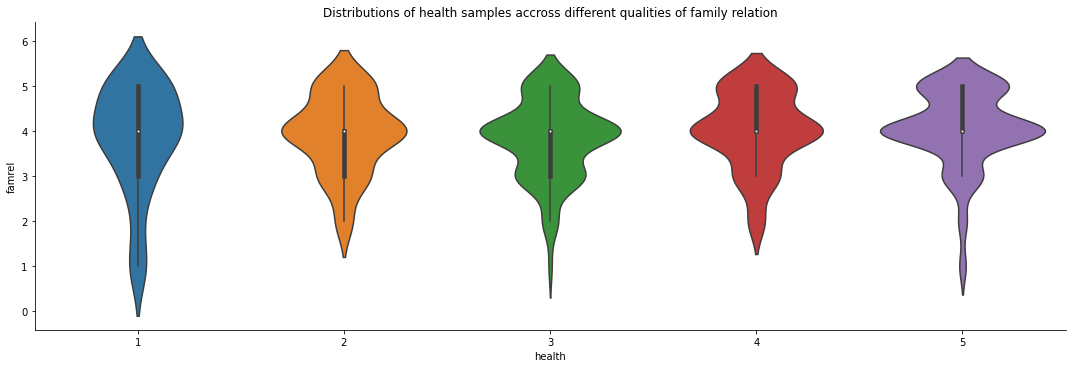

In [483]:
# Violin plot to visualize data distributions
sns.catplot(x="health", y="famrel", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of health samples accross different qualities of family relation")
plt.show()

In [484]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('health ~ famrel', data=df_mat).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df      sum_sq   mean_sq         F    PR(>F)
famrel      1.0    6.737300  6.737300  3.507697  0.061826
Residual  393.0  754.842447  1.920719       NaN       NaN


In [485]:
# Conducting contrast testing
mod = ols("health ~ C(famrel, Sum)", data=df_mat)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.359
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.248
Time:                        23:58:57   Log-Likelihood:                -687.41
No. Observations:                 395   AIC:                             1385.
Df Residuals:                     390   BIC:                             1405.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.3320    

RQ3: Does family relations affect students' health and alcohol intake?  
**Experiment No. 2: Exploring the effect of quality of family relations on students' weekday alcohol consumption**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no difference in means of weekday drinking of students with different quality levels of family relations
    - H1: There is difference in means of weekday drinking of students with different quality levels of family relations
3. **Method**: One-Way Anova
4. **Input Variable(s)**: famrel (Quality of family relationships)
5. **Output Variable**: Dalc (Weekday Alcohol Consumption)

In [486]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['famrel','Dalc']])

Variable  Outcome  Count  Percent
0   famrel        4    195    49.37
1                 5    106    26.84
2                 3     68    17.22
3                 2     18     4.56
4                 1      8     2.03
5     Dalc        1    276    69.87
6                 2     75    18.99
7                 3     26     6.58
8                 5      9     2.28
9                 4      9     2.28

In [487]:
# Extracting relevent data in different dataframes
famrel_1 = df_mat[df_mat['famrel']==1]
famrel_2 = df_mat[df_mat['famrel']==2]
famrel_3 = df_mat[df_mat['famrel']==3]
famrel_4 = df_mat[df_mat['famrel']==4]
famrel_5 = df_mat[df_mat['famrel']==5]
famrel_1_Dalc = famrel_1['Dalc']
famrel_2_Dalc = famrel_2['Dalc']
famrel_3_Dalc = famrel_3['Dalc']
famrel_4_Dalc = famrel_4['Dalc']
famrel_5_Dalc = famrel_5['Dalc']

/Users/Mansi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


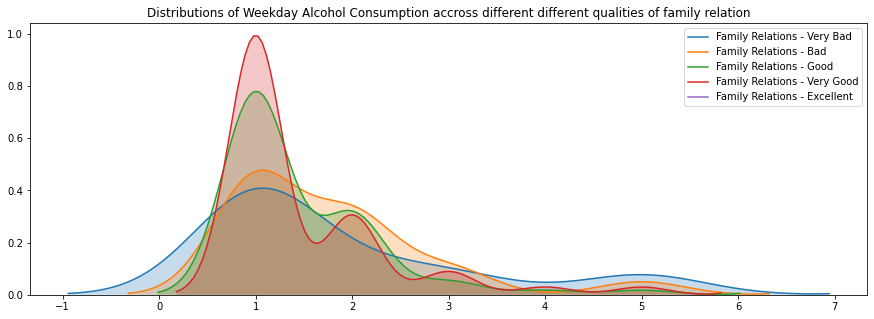

In [488]:
# KDE plot to visualize the distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.kdeplot(famrel_1_Dalc, shade=True, label='Family Relations - Very Bad')
sns.kdeplot(famrel_2_Dalc, shade=True, label='Family Relations - Bad')
sns.kdeplot(famrel_3_Dalc, shade=True, label='Family Relations - Good')
sns.kdeplot(famrel_4_Dalc, shade=True, label='Family Relations - Very Good')
sns.kdeplot(famrel_5_Dalc, shade=True, label='Family Relations - Excellent')
plt.title("Distributions of Weekday Alcohol Consumption accross different different qualities of family relation")
plt.show()

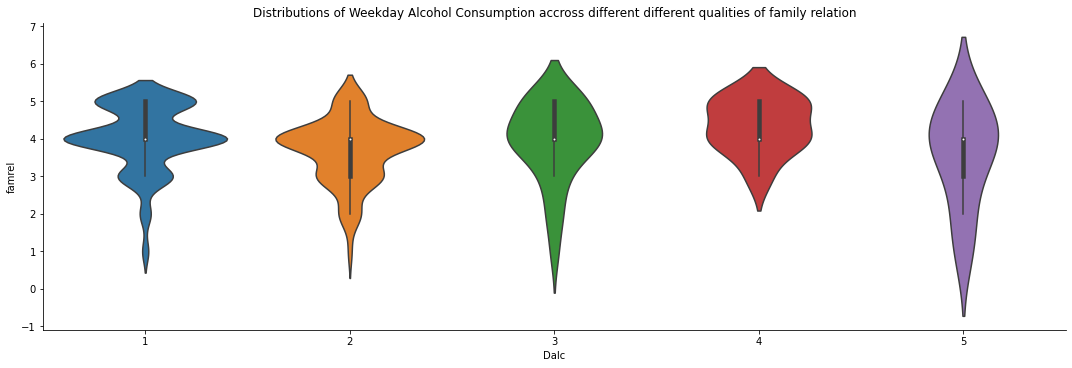

In [489]:
# Violin plot to visualize data distributions
sns.catplot(x="Dalc", y="famrel", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of Weekday Alcohol Consumption accross different different qualities of family relation")
plt.show()

In [490]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('Dalc ~ famrel', data=df_mat).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df      sum_sq   mean_sq        F   PR(>F)
famrel      1.0    1.882174  1.882174  2.38054  0.12366
Residual  393.0  310.725421  0.790650      NaN      NaN


RQ3: Does family relations affect students' health and alcohol intake?  
**Experiment No. 3: Exploring the effect of quality of family relations on students' weekend alcohol consumption**
1. **Design**: Factorial
2. **Hypothesis***
    - H0: There is no difference in means of weekend drinking of students with different quality levels of family relations
    - H1: There is difference in means of weekend drinking of students with different quality levels of family relations
3. **Method**: One-Way Anova
4. **Input Variable(s)**: famrel (Quality of family relationships)
5. **Output Variable** : Walc (Weekday Alcohol Consumption)

In [491]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['famrel','Walc']])

Variable  Outcome  Count  Percent
0   famrel        4    195    49.37
1                 5    106    26.84
2                 3     68    17.22
3                 2     18     4.56
4                 1      8     2.03
5     Walc        1    151    38.23
6                 2     85    21.52
7                 3     80    20.25
8                 4     51    12.91
9                 5     28     7.09

In [492]:
# Extracting relevent data in different dataframes
famrel_1 = df_mat[df_mat['famrel']==1]
famrel_2 = df_mat[df_mat['famrel']==2]
famrel_3 = df_mat[df_mat['famrel']==3]
famrel_4 = df_mat[df_mat['famrel']==4]
famrel_5 = df_mat[df_mat['famrel']==5]
famrel_1_Walc = famrel_1['Walc']
famrel_2_Walc = famrel_2['Walc']
famrel_3_Walc = famrel_3['Walc']
famrel_4_Walc = famrel_4['Walc']
famrel_5_Walc = famrel_5['Walc']

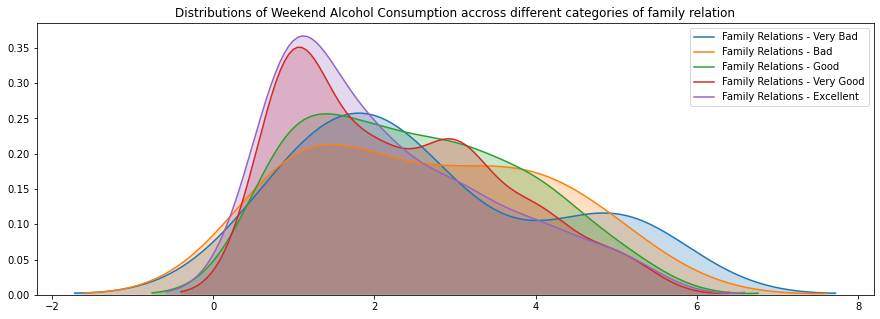

In [493]:
# KDE plot to visualize the distribution of observations
plt.figure(figsize=(15, 5))
sns.kdeplot(famrel_1_Walc, shade=True, label='Family Relations - Very Bad')
sns.kdeplot(famrel_2_Walc, shade=True, label='Family Relations - Bad')
sns.kdeplot(famrel_3_Walc, shade=True, label='Family Relations - Good')
sns.kdeplot(famrel_4_Walc, shade=True, label='Family Relations - Very Good')
sns.kdeplot(famrel_5_Walc, shade=True, label='Family Relations - Excellent')
plt.title("Distributions of Weekend Alcohol Consumption accross different categories of family relation")
plt.show()

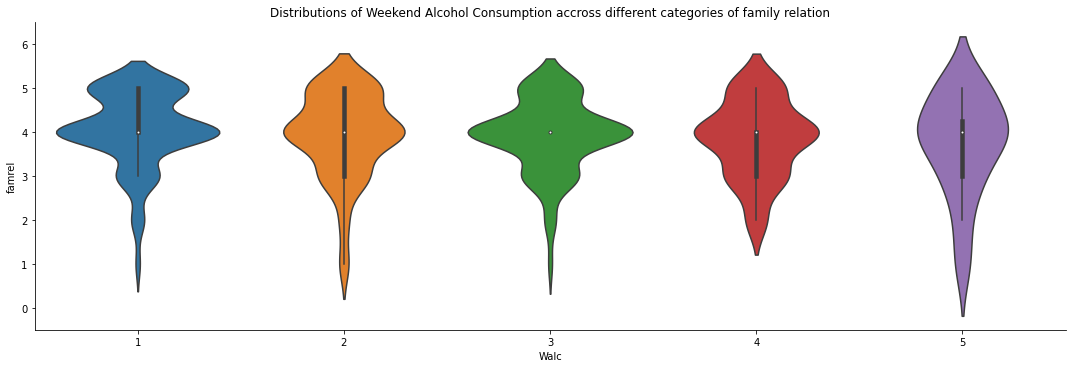

In [494]:
# Violin plot to visualize data distributions
sns.catplot(x="Walc", y="famrel", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of Weekend Alcohol Consumption accross different categories of family relation")
plt.show()

In [495]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('Walc ~ famrel', data=df_mat).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df      sum_sq   mean_sq         F    PR(>F)
famrel      1.0    8.403568  8.403568  5.119397  0.024205
Residual  393.0  645.115420  1.641515       NaN       NaN


**Famrel has a significant effect on weekend alcohol consumption (Walc)**

In [496]:
# Post-hoc test to further explore the difference in individual group means of famrel
sp.posthoc_ttest(df_mat, val_col='Walc', group_col='famrel', p_adjust='holm')

4         5         3    1    2
4  1.0  1.000000  1.000000  1.0  1.0
5  1.0  1.000000  0.588153  1.0  1.0
3  1.0  0.588153  1.000000  1.0  1.0
1  1.0  1.000000  1.000000  1.0  1.0
2  1.0  1.000000  1.000000  1.0  1.0

In [497]:
# Tukey's HSD post-hoc test
interaction_groups = "famrel_" + df_mat.famrel.astype(str)
comp = mc.MultiComparison(df_mat["Walc"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The two post hoc tests show different results. As Tukey's HSD is more conservative test, we go by it and suggest that none of the individual group of family relation has significant effect on weekend alcohol consumption of students.

### RQ2: Besides alcohol, what other factors influence a students academic performance? 
*According to ‘Factors Affecting Students Academic Performance’ by Irfan
Mushtaq, Shabana Nawaz Khan 2 , approach towards communication, learning facilities, proper
guidance and family stress affects the academic performance of students. We want to look into more
factors that influence students’ academic performance. In this research, the academic performance
mainly includes the final grade and class failures*

**Experiment No. 1: Exploring the effect of parent's education, job, cohabitation status, and student's age and failures on their final grades** 
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no significant effect of family relations, Parent's cohabitation status, Mother's education, Father's education, Mother's job, Father's job,age and number of failures on final grades of students
    - H1: There is significant effect of family relations, Parent's cohabitation status, Mother's education, Father's education, Mother's job, Father's job,age and number of failures on final grades of students
3. **Method**: Multi Linear Regression
4. **Input Variable(s)**: 
    famrel (Quality of family relationships)
    Pstatus (Parent's cohabitation status)
    Medu (mother's education)
    Fedu (father's education)
    Mjob (mother's job)
    Fjob (father's job)
    age (student's age)
    failures (number of past class failures)
5. **Output Variable** : G3 (Final grade)

In [498]:
factors_set1_grades = df_mat[['G3','famrel','Pstatus','Medu','Fedu','Mjob','Fjob','age','failures']]

In [499]:
# information on sample size and experimental design
rp.summary_cat(factors_set1_grades[['G3','famrel','Pstatus','Medu','Fedu','Mjob','Fjob','age','failures']])

Variable   Outcome  Count  Percent
0         G3        10     56    14.18
1                   11     47    11.90
2                    0     38     9.62
3                   15     33     8.35
4                    8     32     8.10
5                   13     31     7.85
6                   12     31     7.85
7                    9     28     7.09
8                   14     27     6.84
9                   16     16     4.05
10                   6     15     3.80
11                  18     12     3.04
12                   7      9     2.28
13                   5      7     1.77
14                  17      6     1.52
15                  19      5     1.27
16                   4      1     0.25
17                  20      1     0.25
18    famrel         4    195    49.37
19                   5    106    26.84
20                   3     68    17.22
21                   2     18     4.56
22                   1      8     2.03
23   Pstatus         T    354    89.62
24                   A     41    10.38
25      Medu         4    131    33.16
26                   2    103    26.08
27                   3     99    25.06
28                   1     59    14.94
29                   0      3     0.76
30      Fedu         2    115    29.11
31                   3    100    25.32
32                   4     96    24.30
33                   1     82    20.76
34                   0      2     0.51
35      Mjob     other    141    35.70
36            services    103    26.08
37             at_home     59    14.94
38             teacher     58    14.68
39              health     34     8.61
40      Fjob     other    217    54.94
41            services    111    28.10
42             teacher     29     7.34
43             at_home     20     5.06
44              health     18     4.56
45       age        16    104    26.33
46                  17     98    24.81
47                  18     82    20.76
48                  15     82    20.76
49                  19     24     6.08
50                  20      3     0.76
51                  22      1     0.25
52                  21      1     0.25
53  failures         0    312    78.99
54                   1     50    12.66
55                   2     17     4.30
56                   3     16     4.05

Creating dummy variables for categorical variables

In [500]:
df_dummies = pd.concat([factors_set1_grades,pd.get_dummies(df_mat['Pstatus'], prefix='Pstatus')],axis=1).drop(['Pstatus'],axis=1)

In [501]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['Mjob'], prefix='Mjob')],axis=1).drop(['Mjob'],axis=1)

In [502]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['Fjob'], prefix='Fjob')],axis=1).drop(['Fjob'],axis=1)

In [503]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['Medu'], prefix='Medu')],axis=1).drop(['Medu'],axis=1)

In [504]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['Fedu'], prefix='Fedu')],axis=1).drop(['Fedu'],axis=1)

In [505]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['failures'], prefix='failures')],axis=1).drop(['failures'],axis=1)

In [506]:
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['famrel'], prefix='famrel')],axis=1).drop(['famrel'],axis=1)

In [507]:
df_dummies

G3  age  Pstatus_A  Pstatus_T  Mjob_at_home  Mjob_health  Mjob_other  \
0     6   18          1          0             1            0           0   
1     6   17          0          1             1            0           0   
2    10   15          0          1             1            0           0   
3    15   15          0          1             0            1           0   
4    10   16          0          1             0            0           1   
..   ..  ...        ...        ...           ...          ...         ...   
390   9   20          1          0             0            0           0   
391  16   17          0          1             0            0           0   
392   7   21          0          1             0            0           1   
393  10   18          0          1             0            0           0   
394   9   19          0          1             0            0           1   

     Mjob_services  Mjob_teacher  Fjob_at_home  ...  Fedu_4  failures_0  \
0                0             0             0  ...       1           1   
1                0             0             0  ...       0           1   
2                0             0             0  ...       0           0   
3                0             0             0  ...       0           1   
4                0             0             0  ...       0           1   
..             ...           ...           ...  ...     ...         ...   
390              1             0             0  ...       0           0   
391              1             0             0  ...       0           1   
392              0             0             0  ...       0           0   
393              1             0             0  ...       0           1   
394              0             0             1  ...       0           1   

     failures_1  failures_2  failures_3  famrel_1  famrel_2  famrel_3  \
0             0           0           0         0         0         0   
1             0           0           0         0         0         0   
2             0           0           1         0         0         0   
3             0           0           0         0         0         1   
4             0           0           0         0         0         0   
..          ...         ...         ...       ...       ...       ...   
390           0           1           0         0         0         0   
391           0           0           0         0         1         0   
392           0           0           1         0         0         0   
393           0           0           0         0         0         0   
394           0           0           0         0         0         1   

     famrel_4  famrel_5  
0           1         0  
1           0         1  
2           1         0  
3           0         0  
4           1         0  
..        ...       ...  
390         0         1  
391         0         0  
392         0         1  
393         1         0  
394         0         0  

[395 rows x 33 columns]

In [508]:
#### Define Input and Target output for the model ####
Input = df_dummies.iloc[:,1:]
Target = df_dummies.iloc[:,0]
scaler = MinMaxScaler() 
Input_scaled = scaler.fit_transform(Input) ## Normalizing input data
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
X = Input_scaled
Y = Target 
features = Input.columns

#### Split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Sample size of training set:",len(X_train))

#### Fit the model ####
regr = LinearRegression()
model = regr.fit(X_train, Y_train)

#### Predict the output for test input data ####
y_pred = model.predict(X_test)

# Print regression test summary
X2 = sm.add_constant(Input)
est = sm.OLS(Target, X2)
est2 = est.fit()
print(est2.summary())

Sample size of training set: 316
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.754
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.20e-08
Time:                        23:59:09   Log-Likelihood:                -1116.4
No. Observations:                 395   AIC:                             2285.
Df Residuals:                     369   BIC:                             2388.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 2: What factor's affect the number of failures in Math** 

1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no significant effect of family relations, Parent's cohabitation status, Mother's education, Father's education, Mother's job, Father's job,age and number of failures on number of failures
    - H1: There is significant effect of family relations, Parent's cohabitation status, Mother's education, Father's education, Mother's job, Father's job,age and number of failures on number of failures
3. **Method**: Multi Linear Regression
4. **Input Variable(s)**: 
    famrel (Quality of family relationships)
    Pstatus (Parent's cohabitation status)
    Medu (mother's education)
    Fedu (father's education)
    Mjob (mother's job)
    Fjob (father's job)
    age (student's age)
5. **Output Variable** : failures (number of past class failures)

In [509]:
factors_set1_failures = df_mat[['G3','failures','famrel','Pstatus','Medu','Fedu','Mjob','Fjob','age']]

In [510]:
# Creating dummy variables for categorical independent variables
df_dummies = pd.concat([factors_set1_failures,pd.get_dummies(df_mat['Pstatus'], prefix='Pstatus')],axis=1).drop(['Pstatus'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_mat['Mjob'], prefix='Mjob')],axis=1).drop(['Mjob'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_mat['Fjob'], prefix='Fjob')],axis=1).drop(['Fjob'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_mat['Medu'], prefix='Medu')],axis=1).drop(['Medu'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_mat['Fedu'], prefix='Fedu')],axis=1).drop(['Fedu'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_mat['famrel'], prefix='famrel')],axis=1).drop(['famrel'],axis=1)

In [511]:
#### Define Input and Target output for the model ####
Input = df_dummies.iloc[:,2:]
Target = df_dummies.iloc[:,1]
scaler = MinMaxScaler() ##standard scale
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
X = Input_scaled
Y = Target 
features = Input.columns

#### Split the dataset into train and test (80-20) ####
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Fit the model ####
regr = LinearRegression()
model = regr.fit(X_train, Y_train)

#### Predict the out for test input data ####
y_pred = model.predict(X_test)

# Print Regression test summary
X2 = sm.add_constant(Input)
est = sm.OLS(Target, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               failures   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.319
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           1.16e-06
Time:                        23:59:10   Log-Likelihood:                -407.59
No. Observations:                 395   AIC:                             861.2
Df Residuals:                     372   BIC:                             952.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5093      0.200     -2.545

RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 3: What other factor's affect the final grades of students**

1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no significant effect of family educational support, extra educational support, family size, weekly study time, extra paid classes, extra-curricular activities, and the desire to pursue higher education on final grades of students
    - H1: There is significant effect of family educational support, extra educational support, family size, weekly study time, extra paid classes, extra-curricular activities, and the desire to pursue higher education on final grades of students
3. **Method**: Multi Linear Regression
4. **Input Variable(s)**: 
    studytime (weekly study time)
    schoolsup (extra educational support)
    famsup (family educational support)
    famsize (family size)
    paid (extra paid classes)
    activities (extra-curricular activities)
    higher (desire to pursue higher education)
    romantic (with a romantic relationship)
5. **Output Variable** : G3 (Final grade)

In [512]:
# information on sample size and experimental design
rp.summary_cat(df_mat[["studytime", "schoolsup", "famsup", "famsize", "paid", "activities", "higher","romantic"]])

Variable Outcome  Count  Percent
0    studytime       2    198    50.13
1                    1    105    26.58
2                    3     65    16.46
3                    4     27     6.84
4    schoolsup      no    344    87.09
5                  yes     51    12.91
6       famsup     yes    242    61.27
7                   no    153    38.73
8      famsize     GT3    281    71.14
9                  LE3    114    28.86
10        paid      no    214    54.18
11                 yes    181    45.82
12  activities     yes    201    50.89
13                  no    194    49.11
14      higher     yes    375    94.94
15                  no     20     5.06
16    romantic      no    263    66.58
17                 yes    132    33.42

In [513]:
# Extracting relevent data in different dataframes
factors_set2_grade = df_mat[["G3","studytime", "famsize", "schoolsup", "famsup", "famsize", "paid", "activities", "higher","internet","romantic"]]

In [514]:
# Creating dummy variables for categorical variables
df_dummies = pd.concat([factors_set2_grade,pd.get_dummies(df_mat['studytime'], prefix='studytime')],axis=1).drop(['studytime'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['famsize'], prefix='famsize')],axis=1).drop(['famsize'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['schoolsup'], prefix='schoolsup')],axis=1).drop(['schoolsup'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['famsup'], prefix='famsup')],axis=1).drop(['famsup'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['paid'], prefix='paid')],axis=1).drop(['paid'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['activities'], prefix='activities')],axis=1).drop(['activities'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['higher'], prefix='higher')],axis=1).drop(['higher'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['internet'], prefix='internet')],axis=1).drop(['internet'],axis=1)
df_dummies = pd.concat([df_dummies,pd.get_dummies(df_dummies['romantic'], prefix='romantic')],axis=1).drop(['romantic'],axis=1)

In [515]:
#### Define Input and Target output for the model ####
Input = df_dummies.iloc[:,1:]
Target = df_dummies.iloc[:,0]
scaler = MinMaxScaler() ##standard scale
Input_scaled = scaler.fit_transform(Input)
Input_scaled  = pd.DataFrame(Input_scaled, columns = Input.columns)
Target = pd.DataFrame(Target)
X = Input_scaled
Y = Target 
features = Input.columns

#### Split the dataset into train and test (80-20) ####
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train),len(Y_train))

#### Fit the model ####
regr = LinearRegression()
model = regr.fit(X_train, Y_train)

#### Predict the out for test input data ####
y_pred = model.predict(X_test)

#### Print Regression test summary ####
X2 = sm.add_constant(Input)
est = sm.OLS(Target, X2)
est2 = est.fit()
print(est2.summary())

316 316
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.514
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           0.000105
Time:                        23:59:12   Log-Likelihood:                -1142.2
No. Observations:                 395   AIC:                             2308.
Df Residuals:                     383   BIC:                             2356.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4775      0.119

RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 4: Does internet access affect the final grade of students**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no significant difference in the mean final grades of students with or without internet access
    - H1: There is no significant difference in the mean final grades of students with or without internet access
3. **Method**: One-Way Anova
4. **Input Variable(s)**: internet (Internet access at home)
5. **Output Variable** : G3 (Final Grade)

In [516]:
# Code block taken from <https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/tutorials/statistical-power%20tutorial.ipynb>
# function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

In [517]:
# Code block taken from <https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/tutorials/statistical-power%20tutorial.ipynb>
# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [518]:
# Extracting relevent data in different dataframes
internet_yes = df_mat[df_mat['internet']=='yes']
internet_no = df_mat[df_mat['internet']=='no']
internet_yes_G3 = internet_yes['G3']
internet_no_G3 = internet_no['G3']
print("Sample size of Internet Access - Yes category: ",len(internet_yes_G3))
print("Sample size of Internet Access - No category: ",len(internet_no_G3))

Sample size of Internet Access - Yes category:  329
Sample size of Internet Access - No category:  66


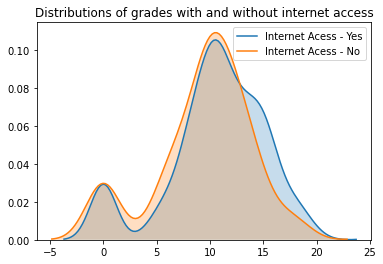

In [519]:
# KDE plot to visualize the distribution of observations
sns.kdeplot(internet_yes_G3, shade=True, label='Internet Acess - Yes')
sns.kdeplot(internet_no_G3, shade=True, label='Internet Acess - No')
plt.title("Distributions of grades with and without internet access")
plt.show()

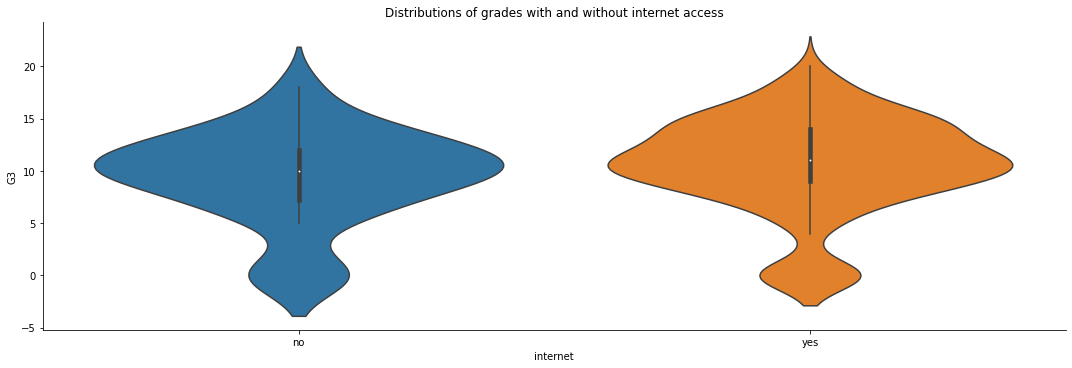

In [520]:
# Violin plot to visualize data distributions
sns.catplot(x="internet", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of grades with and without internet access")
plt.show()

In [521]:
# parameters for power analysis
effect_size = Cohens_d(internet_yes_G3,internet_no_G3)
alpha = 0.05
power = 0.8
ratio_ = 4.9
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size Needed: %.3f' % sample_size)
print("Actual Sample size: ",len(internet_yes_G3)+len(internet_no_G3) )

Effect size is 0.26460874847131177
Sample Size Needed: 135.302
Actual Sample size:  395


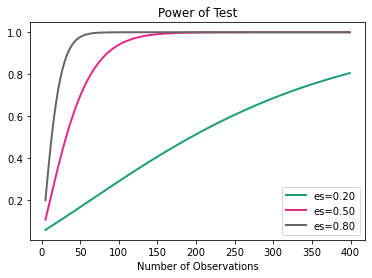

In [522]:
# Code block taken from <https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/tutorials/statistical-power%20tutorial.ipynb>
# calculate power curves for varying sample and effect size
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 400))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [523]:
print("Mean grades for students with internet access is ", internet_yes_G3.mean())
print("Mean grades for students with no internet access is ", internet_no_G3.mean())

Mean grades for students with internet access is  10.617021276595745
Mean grades for students with no internet access is  9.409090909090908


In [524]:
tStat, pValue = stats.ttest_ind(internet_yes_G3, internet_no_G3, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.03676197560784152 T-Statistic:2.2558497877562798

P-Value:0.04955202216078457 T-Statistic:1.9894409453501107


In [525]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ C(internet,Sum)', data=df_mat).fit()
# print summary of linear regression
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.849
Date:                Fri, 09 Apr 2021   Prob (F-statistic):             0.0505
Time:                        23:59:14   Log-Likelihood:                -1159.3
No. Observations:                 395   AIC:                             2323.
Df Residuals:                     393   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0131      0.308     32.526      0.000       9.408      10.618
C(internet, Sum)[S.no]    -0.6040      0.308     -1.962      0.050      -1.209       0.001
==============================================================================
Omnibus:                       33.307   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.255
Skew:                          -0.745   Prob(JB):                     2.99e-09
Kurtosis:                       3.408   Cond. No.                         2.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the regressions we saw that internet and romantic relationship have a significant effect on the final grades of students. Next, we will explore if there is any interaction between these two factors

RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 5: Explore the effect of internet access and presence of romantic relations, together on final grade of students**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no interaction effect of internet access and romantic relationship on final grades of students 
    - H1: There is interaction effect of internet access and romantic relationship on final grades of students
3. **Method**: Tukey's HSD
4. **Input Variable(s)**: internet (Internet access at home)
5. **Output Variable** : G3 (Final Grade)

In [526]:
# Tukey HSD post hoc test to see the interaction effect of different groups of treatments
interaction_groups = "Internet_" + df_mat.internet.astype(str) + " & " + "romantic_" + df_mat.romantic.astype(str)
comp = mc.MultiComparison(df_mat["G3"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [527]:
# Bonferroni Correction
pvals = [0.9, 0.1213, 0.9, 0.2416, 0.9, 0.0261]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[False False False False False False]
[1.     0.7278 1.     1.     1.     0.1566]


RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 6: Does the desire for higher education affect the final grade of students
Details**
1. **Design**: Factorial
2. **Hypothesis**
    - H0: There is no significant difference in the mean final grades of students with or without the desire for higher education
    - H1: There is significant difference in the mean final grades of students with or without the desire for higher education
3. **Method**: One-Way Anova
4. **Input Variable(s)**: higher (wants to take higher education)
5. **Output Variable** : G3 (Final Grade)

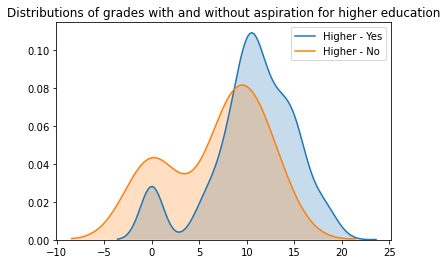

In [528]:
# KDE plot to visualize the distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(higher_yes_G3, shade=True, label='Higher - Yes')
sns.kdeplot(higher_no_G3, shade=True, label='Higher - No')
plt.title("Distributions of grades with and without aspiration for higher education")
plt.show()

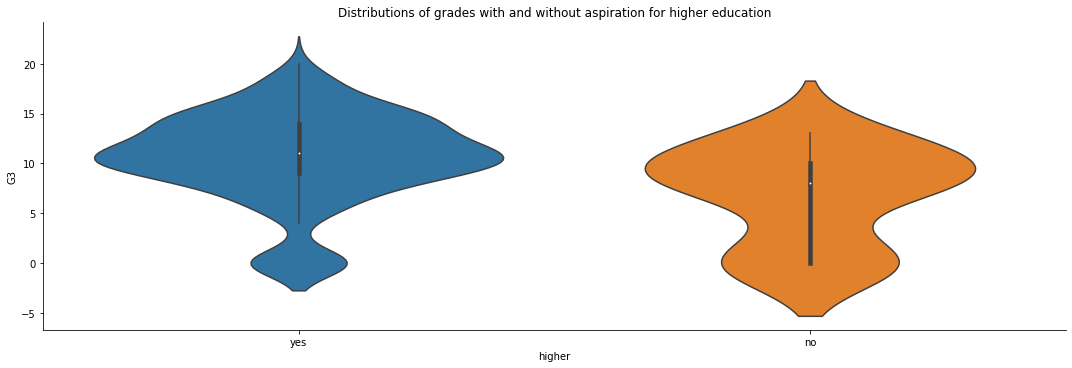

In [529]:
# Violin plot to visualize data distributions
sns.catplot(x="higher", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of grades with and without aspiration for higher education")
plt.show()

In [530]:
# Extracting the data for higher variable
higher_yes = df_mat[df_mat['higher']=='yes']
higher_no = df_mat[df_mat['higher']=='no']
higher_yes_G3 = higher_yes['G3']
higher_no_G3 = higher_no['G3']

print("Sample size of students who want to pursue higher education is: ", higher_yes_G3.count())
print("Sample size of students who do not want to pursue higher education is: ", higher_no_G3.count())

# parameters for power analysis
effect_size = Cohens_d(higher_yes_G3,higher_no_G3)
alpha = 0.05
power = 0.8
ratio_ = 4.9

print('Effect size is {0}'.format(effect_size))

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size Needed: %.3f' % sample_size)
print("Actual Sample size: ",len(higher_yes_G3)+len(higher_no_G3) )


Sample size of students who want to pursue higher education is:  375
Sample size of students who do not want to pursue higher education is:  20
Effect size is 0.8442974880528606
Sample Size Needed: 13.591
Actual Sample size:  395


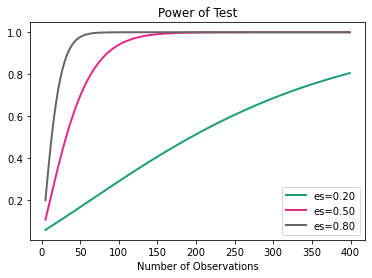

In [531]:
# Code block taken from <https://github.com/shionguha/inf2178h-experimentaldesign-hcds/blob/main/tutorials/statistical-power%20tutorial.ipynb>
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 400))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [532]:
tStat, pValue = stats.ttest_ind(higher_yes_G3, higher_no_G3, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.03676197560784152 T-Statistic:2.2558497877562798

P-Value:0.002440033985581924 T-Statistic:3.4473779245028155


In [533]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ C(higher,Sum)', data=df_mat).fit()
# print summary of linear regression
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.53
Date:                Fri, 09 Apr 2021   Prob (F-statistic):           0.000267
Time:                        23:59:16   Log-Likelihood:                -1154.5
No. Observations:                 395   AIC:                             2313.
Df Residuals:                     393   BIC:                             2321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.7040      0.518     16.818      0.000       7.687       9.721
C(higher, Sum)[S.no]    -1.9040      0.518     -3.679      0.000      -2.921      -0.887
==============================================================================
Omnibus:                       32.148   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.610
Skew:                          -0.730   Prob(JB):                     6.81e-09
Kurtosis:                       3.395   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From regression tests we found that mother's education and mother's job affect the final grades of students significantly. In the following two experiments we will explore the individual effects of the different education levels and jobs on final grades

RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 7: How does a mother's education level affect the final grades of students**
1. **Design**: Factorial
2. **Method**: One-Way Anova, Tukey's HSD
3. **Input Variable(s)**: Medu (mother's education)
4. **Output Variable** : G3 (Final Grade)

In [534]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['Medu','G3']])

Variable  Outcome  Count  Percent
0      Medu        4    131    33.16
1                  2    103    26.08
2                  3     99    25.06
3                  1     59    14.94
4                  0      3     0.76
5        G3       10     56    14.18
6                 11     47    11.90
7                  0     38     9.62
8                 15     33     8.35
9                  8     32     8.10
10                13     31     7.85
11                12     31     7.85
12                 9     28     7.09
13                14     27     6.84
14                16     16     4.05
15                 6     15     3.80
16                18     12     3.04
17                 7      9     2.28
18                 5      7     1.77
19                17      6     1.52
20                19      5     1.27
21                 4      1     0.25
22                20      1     0.25

In [535]:
# Extracting relevent data in different dataframes
Medu_0 = df_mat[df_mat['Medu']==0]
Medu_1 = df_mat[df_mat['Medu']==1]
Medu_2 = df_mat[df_mat['Medu']==2]
Medu_3 = df_mat[df_mat['Medu']==3]
Medu_4 = df_mat[df_mat['Medu']==4]
Medu_0_G3 = Medu_0['G3']
Medu_1_G3 = Medu_1['G3']
Medu_2_G3 = Medu_2['G3']
Medu_3_G3 = Medu_3['G3']
Medu_4_G3 = Medu_4['G3']

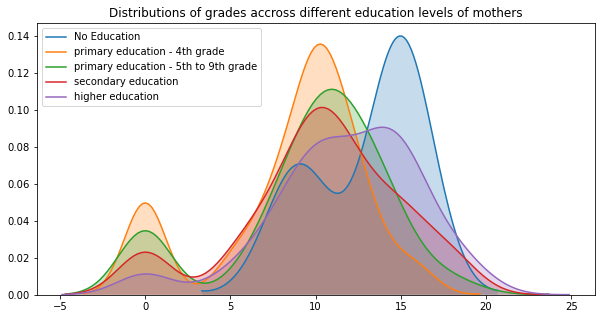

In [536]:
# KDE plot to visualize the distribution of observations
plt.figure(figsize=(10, 5))
sns.kdeplot(Medu_0_G3, shade=True, label='No Education')
sns.kdeplot(Medu_1_G3, shade=True, label='primary education - 4th grade')
sns.kdeplot(Medu_2_G3, shade=True, label='primary education - 5th to 9th grade')
sns.kdeplot(Medu_3_G3, shade=True, label='secondary education')
sns.kdeplot(Medu_4_G3, shade=True, label='higher education')
plt.title("Distributions of grades accross different education levels of mothers")
plt.show()

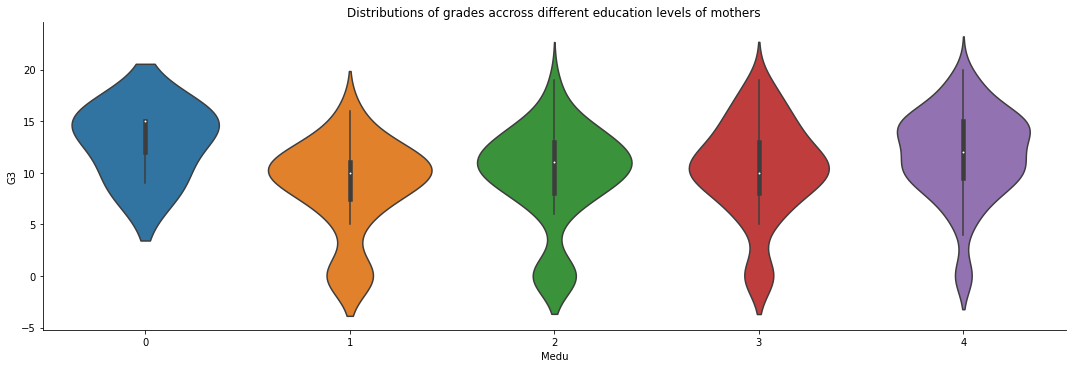

In [537]:
# Violin plot to visualize data distributions
sns.catplot(x="Medu", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of grades accross different education levels of mothers")
plt.show()

In [538]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ Medu', data=df_mat).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

             df       sum_sq     mean_sq          F    PR(>F)
Medu        1.0   389.951303  389.951303  19.448184  0.000013
Residual  393.0  7879.957558   20.050783        NaN       NaN


In [539]:
# Tukey HSD post-hoc test 
interaction_groups = "Medu_" + df_mat.Medu.astype(str)
comp = mc.MultiComparison(df_mat["G3"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [540]:
# Bonferroni Correction
pvals = [0.477, 0.6959, 0.8206, 0.9, 0.5888, 0.1774, 0.001, 0.8862, 0.0054, 0.1034 ]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[False False False False False False  True False False False]
[1.    1.    1.    1.    1.    1.    0.01  1.    0.054 1.   ]


RQ2: Besides alcohol, what other factors influence a students academic performance?  
**Experiment No. 8: How does a mother's job type affect final grades of students**
1. **Design**: Factorial
2. **Method**: One-Way Anova, Tukey's HSD
3. **Input Variable(s)**: Mjob (mother's education)
4. **Output Variable** : G3 (Final Grade)

In [541]:
# information on sample size and experimental design
rp.summary_cat(df_mat[['Mjob','G3']])

Variable   Outcome  Count  Percent
0      Mjob     other    141    35.70
1            services    103    26.08
2             at_home     59    14.94
3             teacher     58    14.68
4              health     34     8.61
5        G3        10     56    14.18
6                  11     47    11.90
7                   0     38     9.62
8                  15     33     8.35
9                   8     32     8.10
10                 13     31     7.85
11                 12     31     7.85
12                  9     28     7.09
13                 14     27     6.84
14                 16     16     4.05
15                  6     15     3.80
16                 18     12     3.04
17                  7      9     2.28
18                  5      7     1.77
19                 17      6     1.52
20                 19      5     1.27
21                  4      1     0.25
22                 20      1     0.25

In [542]:
# Extracting relevent data in different dataframes
Mjob_teacher = df_mat[df_mat['Mjob']=='teacher']
Mjob_health = df_mat[df_mat['Mjob']=='health']
Mjob_civilServices = df_mat[df_mat['Mjob']=='services']
Mjob_at_home = df_mat[df_mat['Mjob']=='at_home']
Mjob_other = df_mat[df_mat['Mjob']=='other']
Mjob_teacher_G3 = Mjob_teacher['G3']
Mjob_health_G3 = Mjob_health['G3']
Mjob_civilServices_G3 = Mjob_civilServices['G3']
Mjob_at_home_G3 = Mjob_at_home['G3']
Mjob_other_G3 = Mjob_other['G3']

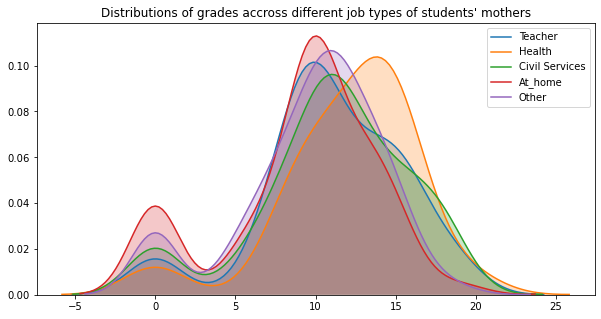

In [543]:
# KDE plot to visualize the distribution of observations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.kdeplot(Mjob_teacher_G3, shade=True, label='Teacher')
sns.kdeplot(Mjob_health_G3, shade=True, label='Health')
sns.kdeplot(Mjob_civilServices_G3, shade=True, label='Civil Services')
sns.kdeplot(Mjob_at_home_G3, shade=True, label='At_home')
sns.kdeplot(Mjob_other_G3, shade=True, label='Other')
plt.title("Distributions of grades accross different job types of students' mothers")
plt.show()

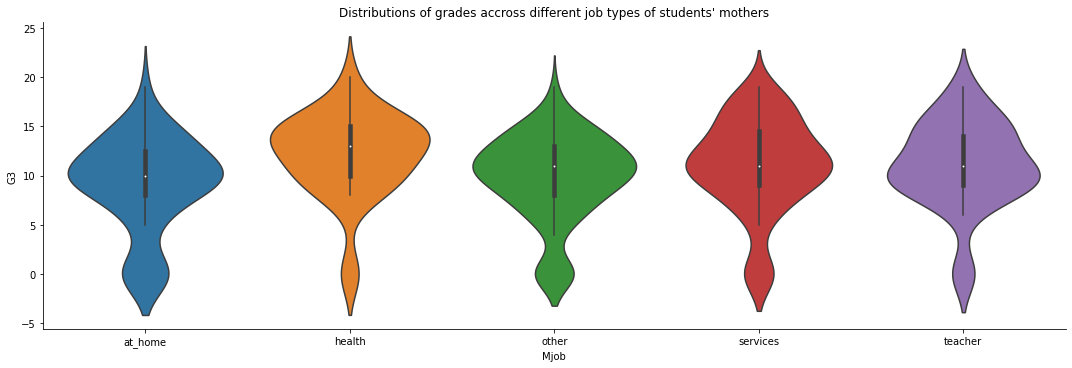

In [544]:
# Violin plot to visualize data distributions
sns.catplot(x="Mjob", y="G3", data=df_mat, dodge=True, kind='violin', aspect=3)
plt.title("Distributions of grades accross different job types of students' mothers")
plt.show()

In [545]:
# generate fit model to data to obtain parameter estimates
lm = sfa.ols('G3 ~ C(Mjob,Sum)', data=df_mat).fit()
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                 df       sum_sq    mean_sq        F    PR(>F)
C(Mjob, Sum)    4.0   306.643668  76.660917  3.75446  0.005195
Residual      390.0  7963.265193  20.418629      NaN       NaN


In [546]:
# Tukey HSD Post-hoc test
interaction_groups = "Mjob_" + df_mat.Mjob.astype(str)
comp = mc.MultiComparison(df_mat["G3"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [547]:
# Bonferroni Correction
pvals = [0.0189, 0.8623, 0.0862, 0.1559, 0.057, 0.6895, 0.7685, 0.2474, 0.41, 0.9]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

[False False False False False False False False False False]
[0.189 1.    0.862 1.    0.57  1.    1.    1.    1.    1.   ]


#### END